In [67]:
using LinearAlgebra, Statistics, Printf, CSV, DataFrames

#### Zadanie 1

In [19]:
A = rand(1000,1000)
x= rand(1000)
b= A*x
A_fac = factorize(A)

times_inv = Float64[]
times_slash = Float64[]
times_fac = Float64[]

errors_inv = Float64[]
errors_slash = Float64[]
errors_fac = Float64[]

N = 10

for i in 1:N+1
    t1 = @elapsed b_inv  = inv(A) * x
    t2 = @elapsed b_slash = A \ x
    t3 = @elapsed b_fac = A_fac \ x

    if i > 1
        push!(times_inv, t1)
        push!(times_slash, t2)
        push!(times_fac, t3)

        push!(errors_inv, norm(b_inv - b))
        push!(errors_slash, norm(b_slash - b))
        push!(errors_fac, norm(b_fac - b))
    end
end

println("Średni czas (inv):       ", mean(times_inv))
println("Średni czas (slash):     ", mean(times_slash))
println("Średni czas (factorize): ", mean(times_fac))

println("Średni błąd (inv):       ", mean(errors_inv))
println("Średni błąd (slash):     ", mean(errors_slash))
println("Średni błąd (factorize): ", mean(errors_fac))


Średni czas (inv):       0.03597229
Średni czas (slash):     0.021376809999999993
Średni czas (factorize): 0.00052924
Średni błąd (inv):       7941.325075713847
Średni błąd (slash):     7941.325075713847
Średni błąd (factorize): 7941.325075713847


#### Zadanie 2

Korzystam z danych bicia serca (lab6)

In [ ]:
ekg_data = CSV.read("ecg_data.csv", DataFrame)
xx_ekg = ekg_data.time .* 40
yy_ekg = ekg_data.signalV
nothing

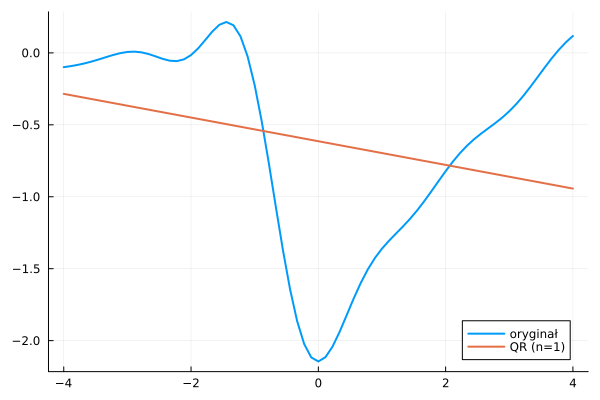

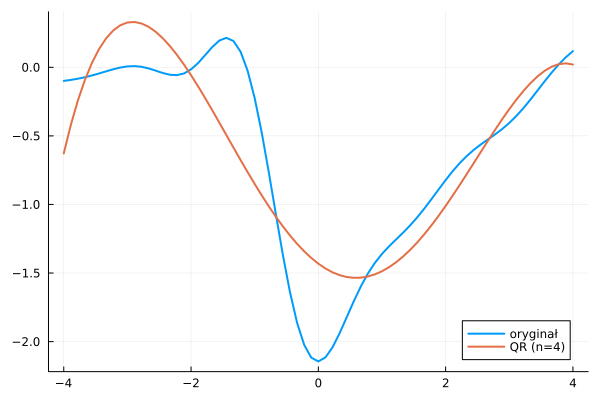

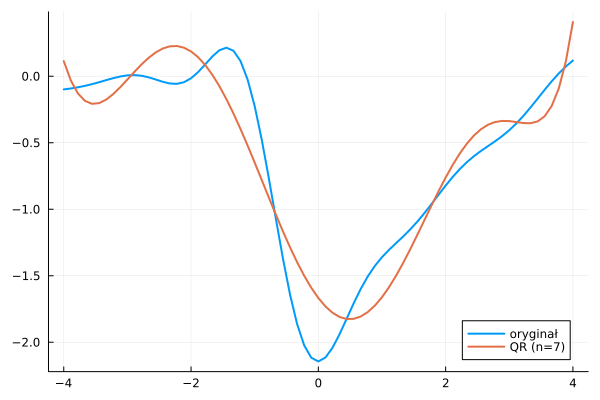

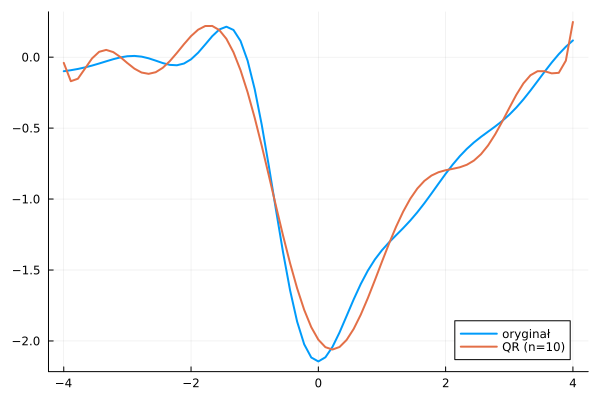

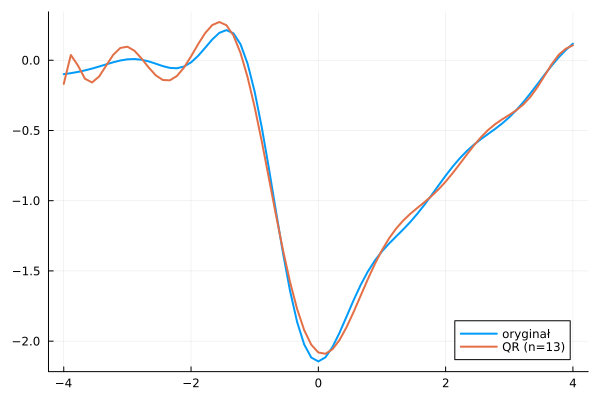

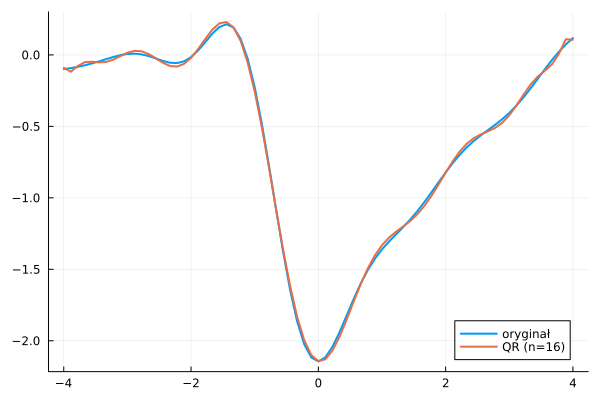

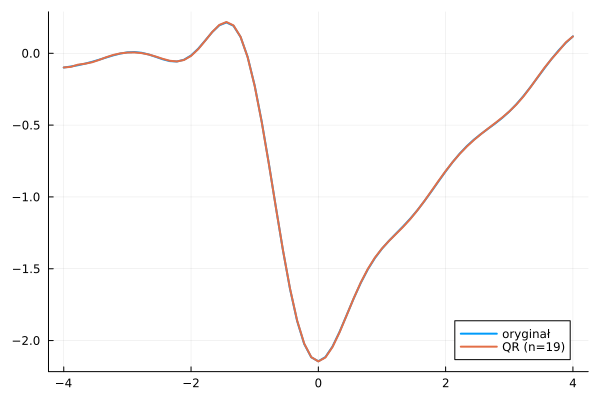

In [ ]:
for n in 1:3:20

    A = hcat([xx_ekg .^ i for i in 0:n]...)

    F = qr(A)
    c_qr = F \ yy_ekg # Wsp

    y_qr = A * c_qr

    plt = plot(xx_ekg, yy_ekg, label="oryginał", lw=2)
    plot!(xx_ekg, y_qr, label="QR (n=$n)", lw=2)
    display(plt)
end
# nothing

#### Zadanie 3 - tworzenie pseudoinwersji

SVD - Singular Value Decomposition
Polega na rozłożeniu A na 3 składniki $U Σ V^T$

- U - ortonormalna macierz kolumnowa (lewe wek.)
- Σ - macieerz diagonalna zawierająca wektory osobliwe
- V - ortonormalna macierz kolumnowa (prawe wek.)

```
U, s, V = svd(A)
```
Diagonal(1 ./ s) tworzy Σ

```
U'
```
Transpozycja U

In [11]:
using LinearAlgebra

A = [
    1.0  -1.0   4.0;
    1.0   4.0  -2.0;
    1.0   4.0   2.0;
    1.0  -1.0   0.0
]

U, s, V = svd(A)

s_inv = Diagonal(1 ./ s)

A_plus = V * s_inv * U'

reconstructed = A * A_plus * A

println("\nA * A⁺ * A =")
reconstructed


A * A⁺ * A =


4×3 Matrix{Float64}:
 1.0  -1.0   4.0
 1.0   4.0  -2.0
 1.0   4.0   2.0
 1.0  -1.0  -3.60822e-16